In [104]:
import os 
import tarfile
from six.moves import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url = HOUSING_URL,housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path=os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz=tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [105]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path=os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [106]:
fetch_housing_data()

In [107]:
housing=load_housing_data()
housing.count()

longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20433
population            20640
households            20640
median_income         20640
median_house_value    20640
ocean_proximity       20640
dtype: int64

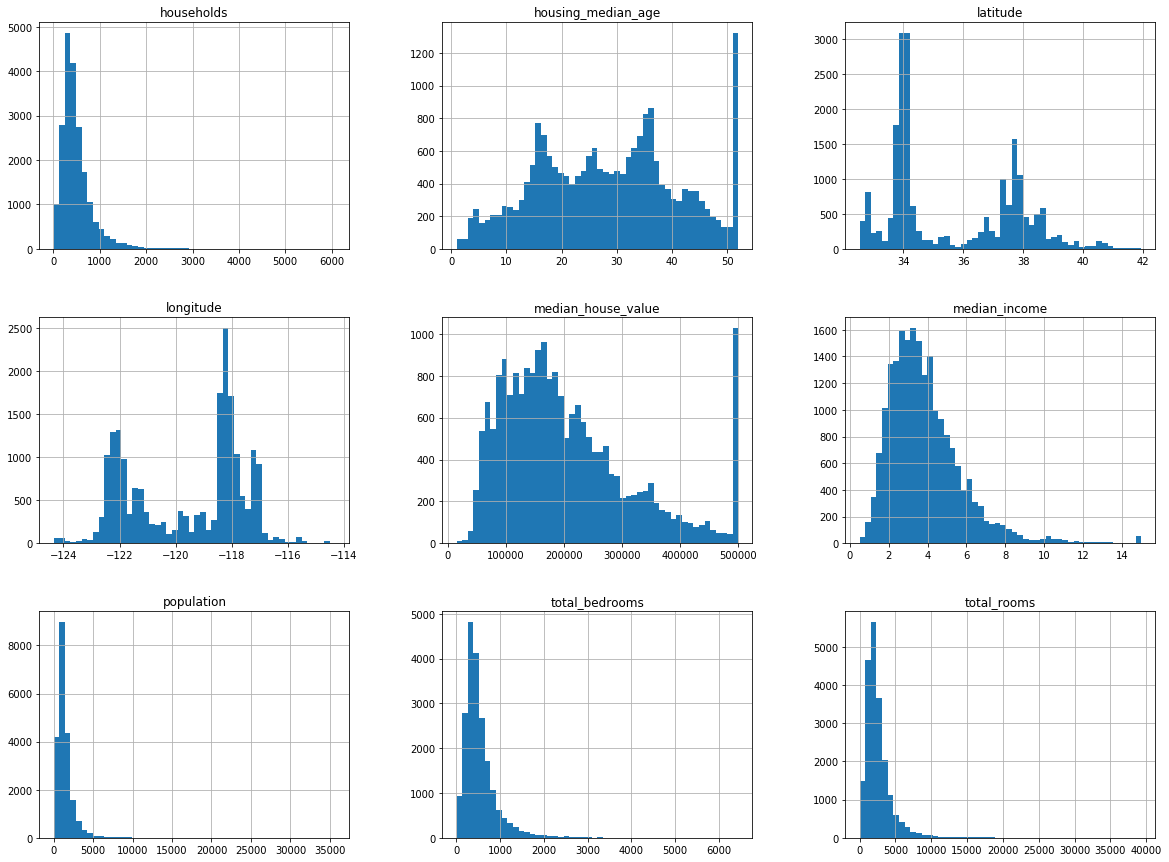

In [108]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [109]:
housing["median_house_value"].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [110]:
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(100)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [111]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


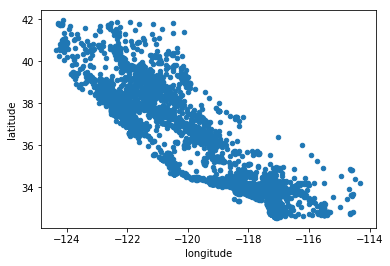

In [112]:
housing=train_set.copy()
housing.plot(kind="scatter",x="longitude",y="latitude")

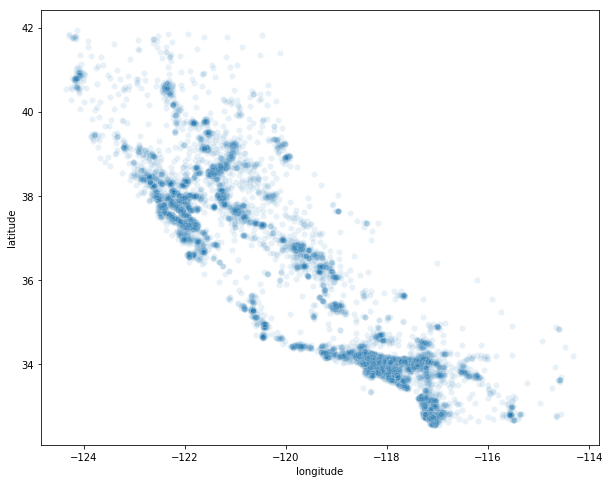

In [113]:
import seaborn as sns
plt.subplots(figsize=(10,8))
sns.scatterplot(data=housing,x="longitude",y="latitude",alpha=0.1)

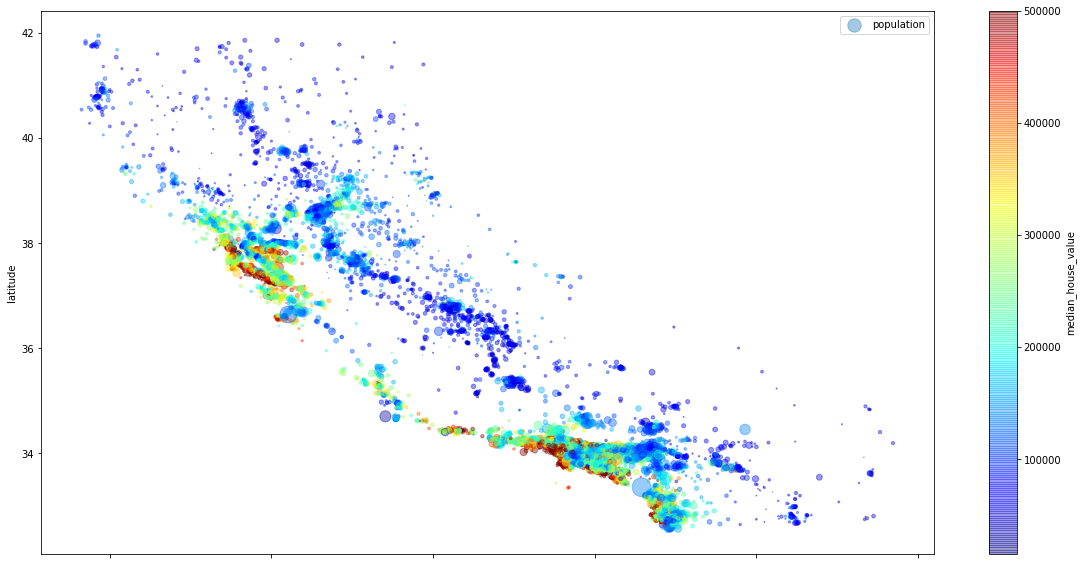

In [114]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/100, label="population", figsize=(20,10),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [115]:
corr_matrix=housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924792,-0.105781,0.041137,0.067619,0.095458,0.052926,-0.022178,-0.051786
latitude,-0.924792,1.000000,0.009945,-0.034474,-0.066470,-0.106345,-0.070479,-0.073860,-0.138945
housing_median_age,-0.105781,0.009945,1.000000,-0.361533,-0.320044,-0.292876,-0.301783,-0.120304,0.104202
total_rooms,0.041137,-0.034474,-0.361533,1.000000,0.929450,0.856229,0.918510,0.197601,0.132195
total_bedrooms,0.067619,-0.066470,-0.320044,0.929450,1.000000,0.874867,0.979860,-0.009886,0.047392
population,0.095458,-0.106345,-0.292876,0.856229,0.874867,1.000000,0.903962,0.005286,-0.025418
households,0.052926,-0.070479,-0.301783,0.918510,0.979860,0.903962,1.000000,0.011480,0.064034
median_income,-0.022178,-0.073860,-0.120304,0.197601,-0.009886,0.005286,0.011480,1.000000,0.684498
median_house_value,-0.051786,-0.138945,0.104202,0.132195,0.047392,-0.025418,0.064034,0.684498,1.000000


In [116]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.684498
total_rooms           0.132195
housing_median_age    0.104202
households            0.064034
total_bedrooms        0.047392
population           -0.025418
longitude            -0.051786
latitude             -0.138945
Name: median_house_value, dtype: float64

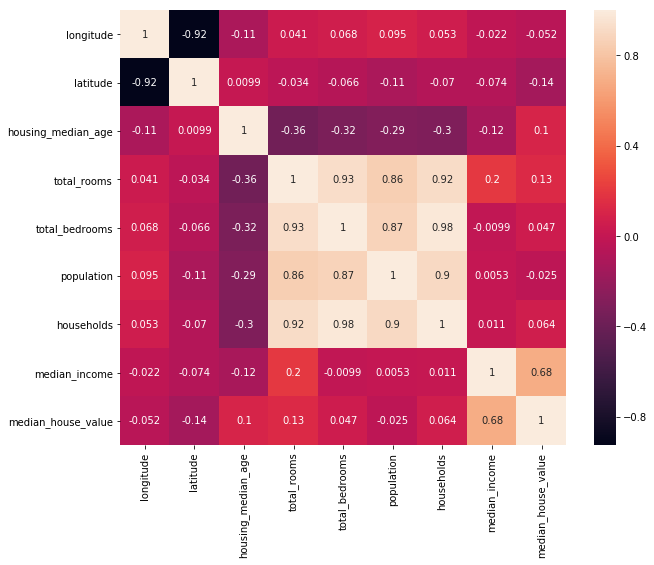

In [117]:
import seaborn as sns
plt.subplots(figsize=(10,8))
sns.heatmap(housing.corr(),annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F280368630>,
      dtype=object)

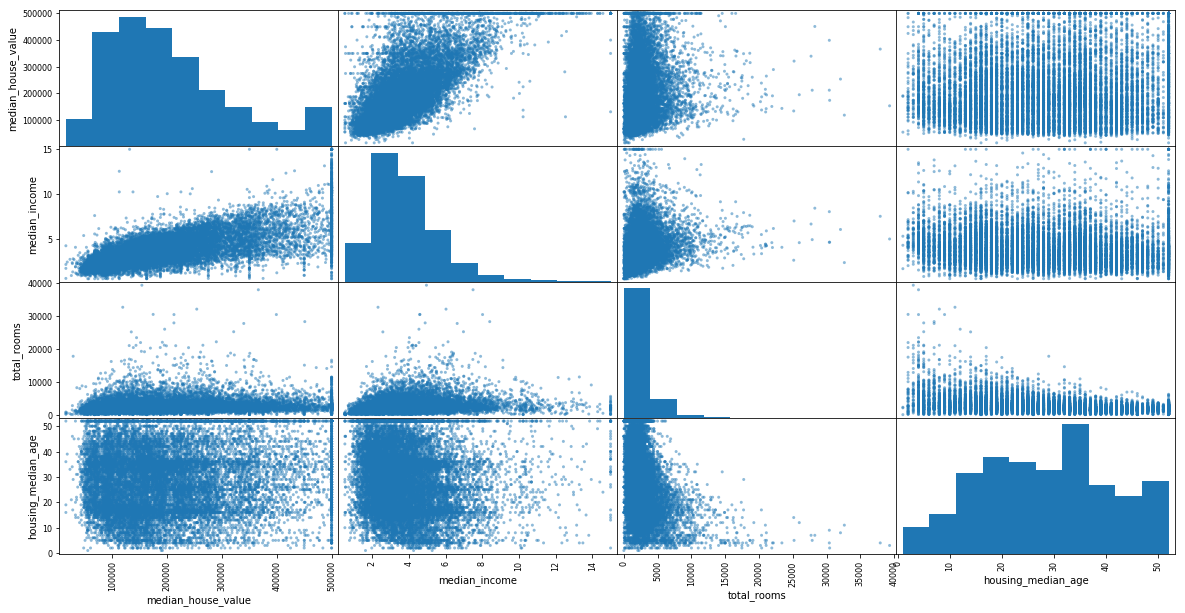

In [118]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(housing[attributes], figsize=(20, 10))

In [119]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.684498
rooms_per_household         0.151993
total_rooms                 0.132195
housing_median_age          0.104202
households                  0.064034
total_bedrooms              0.047392
population_per_household   -0.023074
population                 -0.025418
longitude                  -0.051786
latitude                   -0.138945
bedrooms_per_room          -0.249208
Name: median_house_value, dtype: float64

In [120]:
housing = train_set.drop("median_house_value", axis=1)
housing_labels = train_set["median_house_value"].copy()

In [121]:
#housing.dropna(subset=["total_bedrooms"]) # option 1
#housing.drop("total_bedrooms", axis=1) # option 2
#median = housing["total_bedrooms"].median()
#housing["total_bedrooms"].fillna(median)

In [122]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

C:\Users\Prabal\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [123]:
#imputer.statistics_
#housing_num.median().values

In [124]:
housing_tr.count()

longitude             16512
latitude              16512
housing_median_age    16512
total_rooms           16512
total_bedrooms        16512
population            16512
households            16512
median_income         16512
dtype: int64